In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'n2o',
                          'band07_wn_1215_1380',
                          'P_50_T_250',
                          'min_4e-21_max_1e-17_ng_6_dlogN_.3_.3_.1_.1_.1',
                          'wgt_1_.8_.7_.6_.6_.6_.6',
                          'midlatitude_summer')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'n2o',
                               'band07_wn_1215_1380',
                               'P_50_T_250',
                               'min_4e-21_max_1e-17_ng_6_dlogN_.3_.3_.1_.1_.1',
                               'wgt_1_.8_.7_.6_.6_.6_.6',
                               'midlatitude_summer')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5, 6]:
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

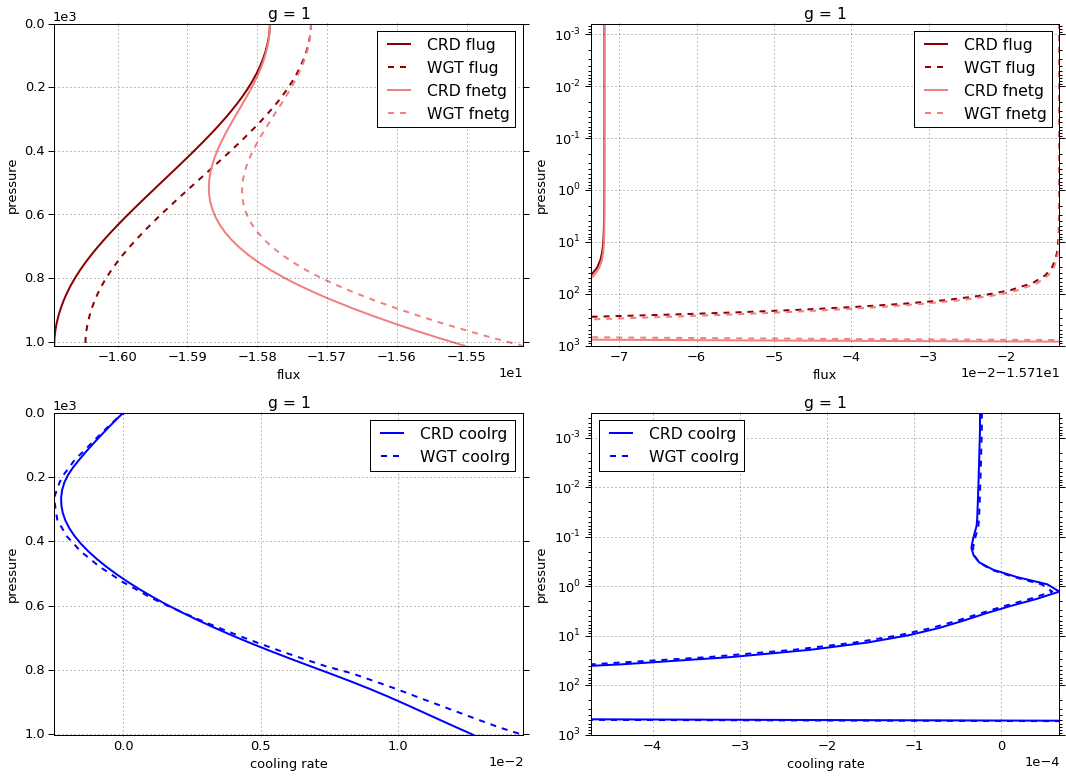

# Figure: flux, cooling rate. g-group 2

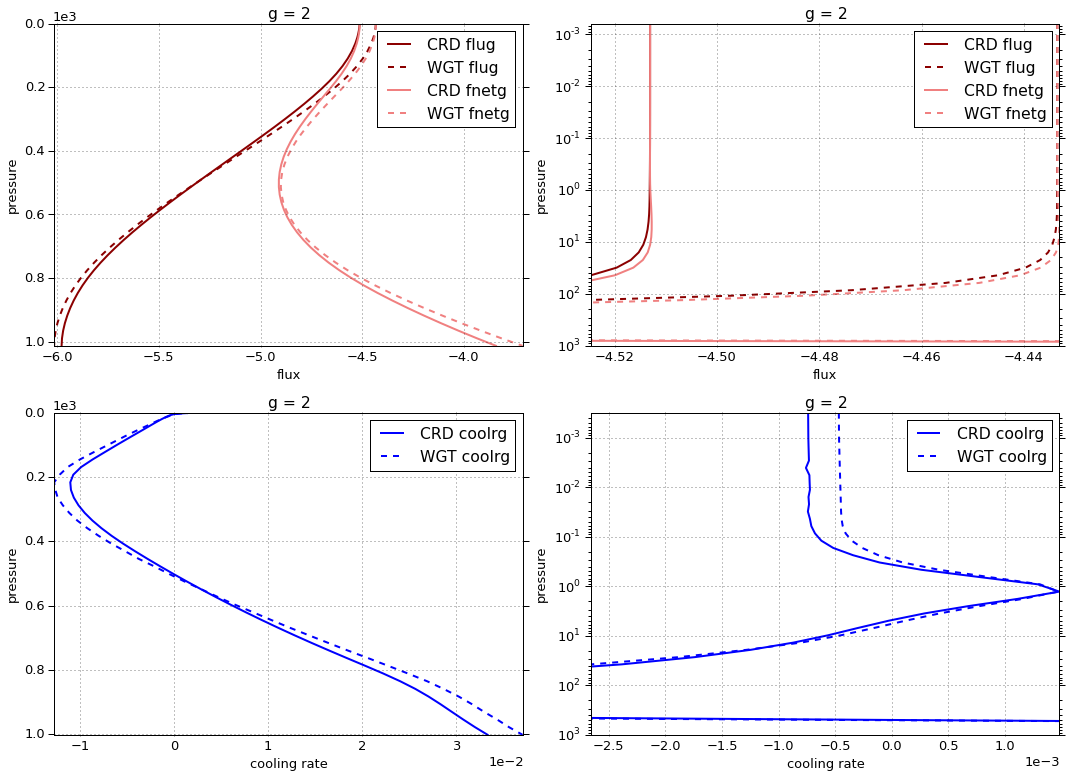

# Figure: flux, cooling rate. g-group 3

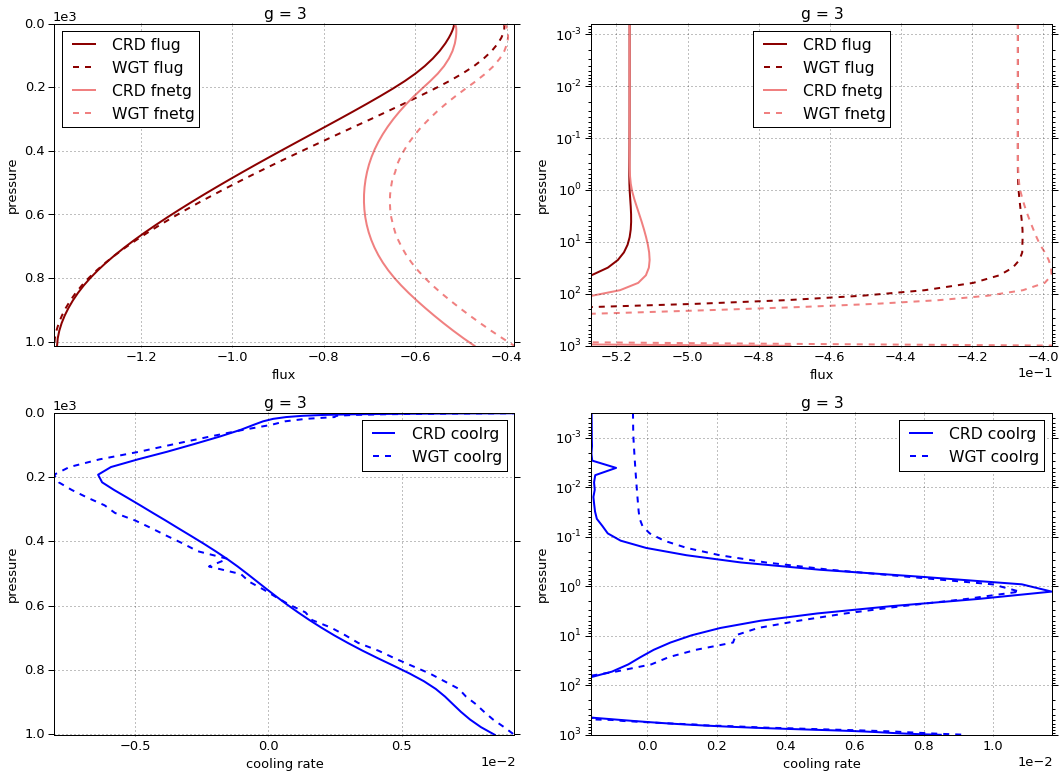

# Figure: flux, cooling rate. g-group 4

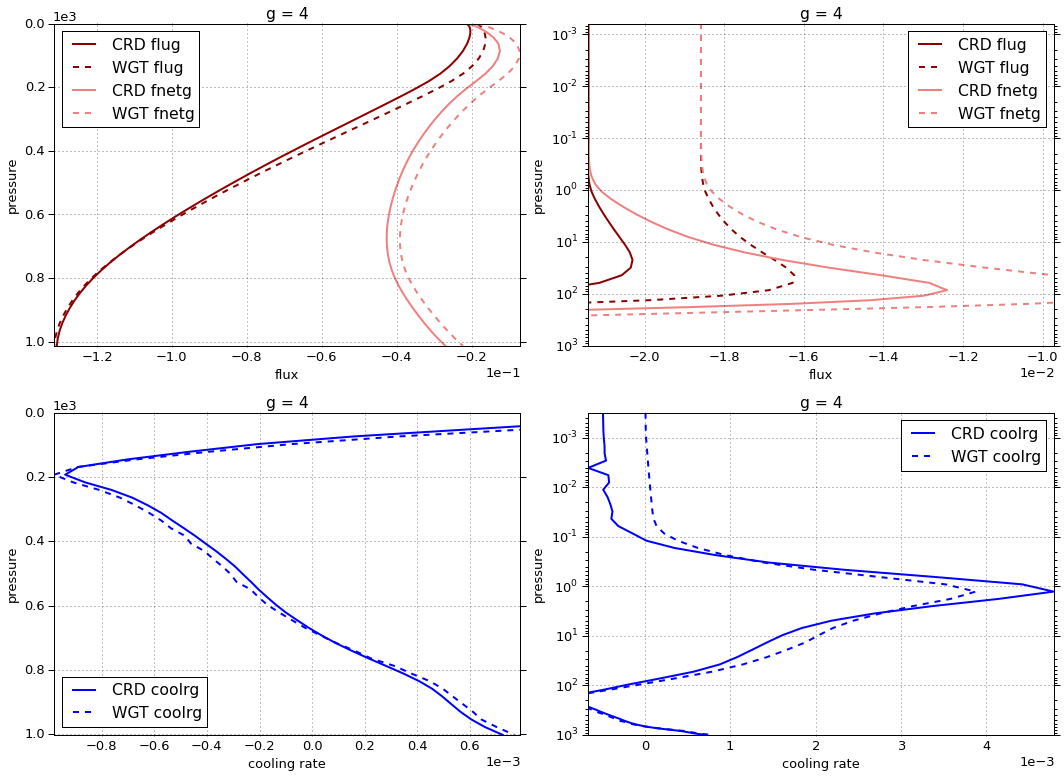

# Figure: flux, cooling rate. g-group 5

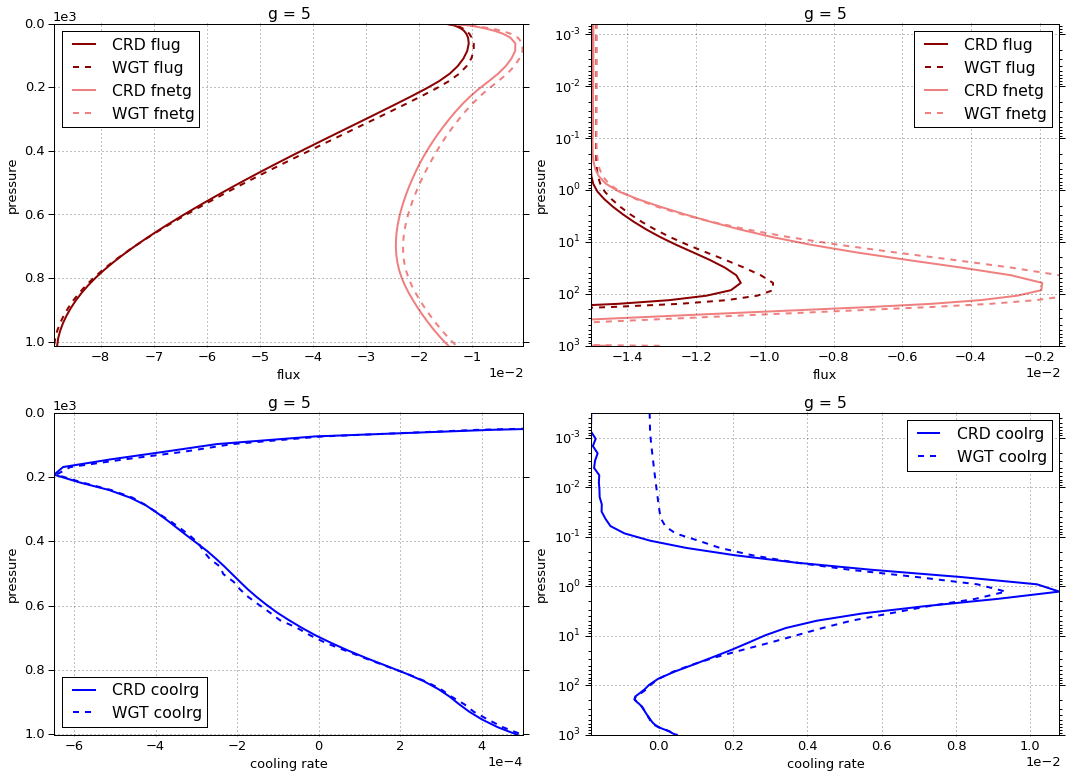

# Figure: flux, cooling rate. g-group 6

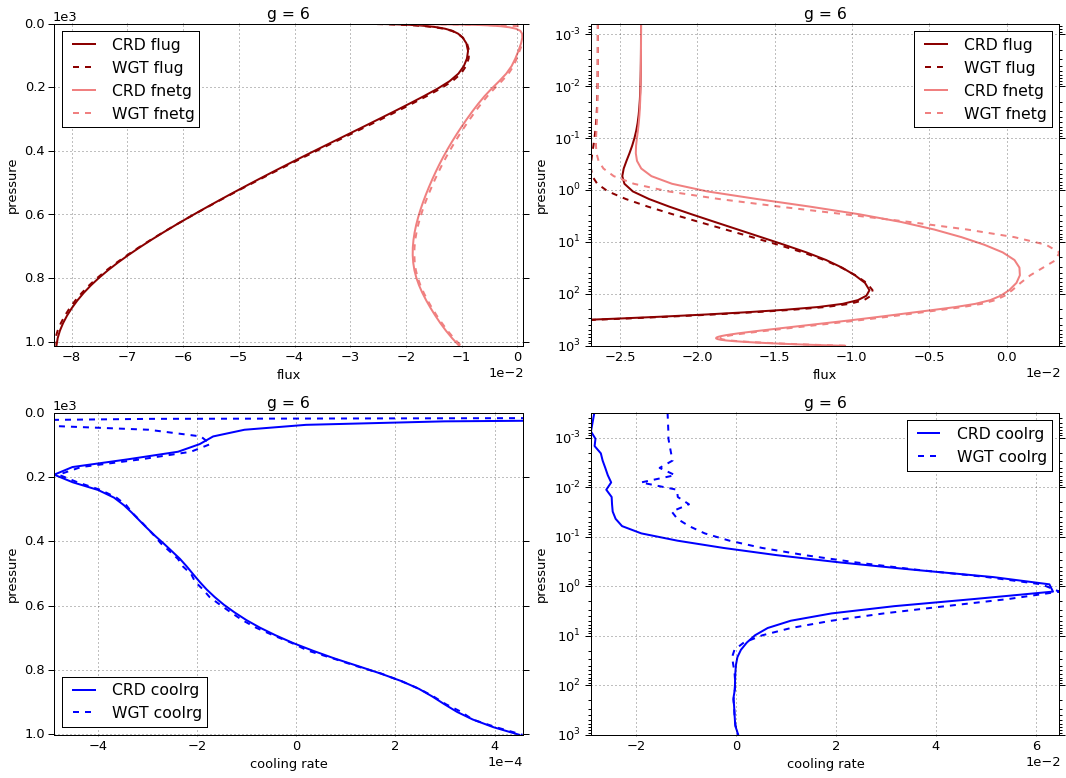

# Figure: flux, cooling rate. g-group total

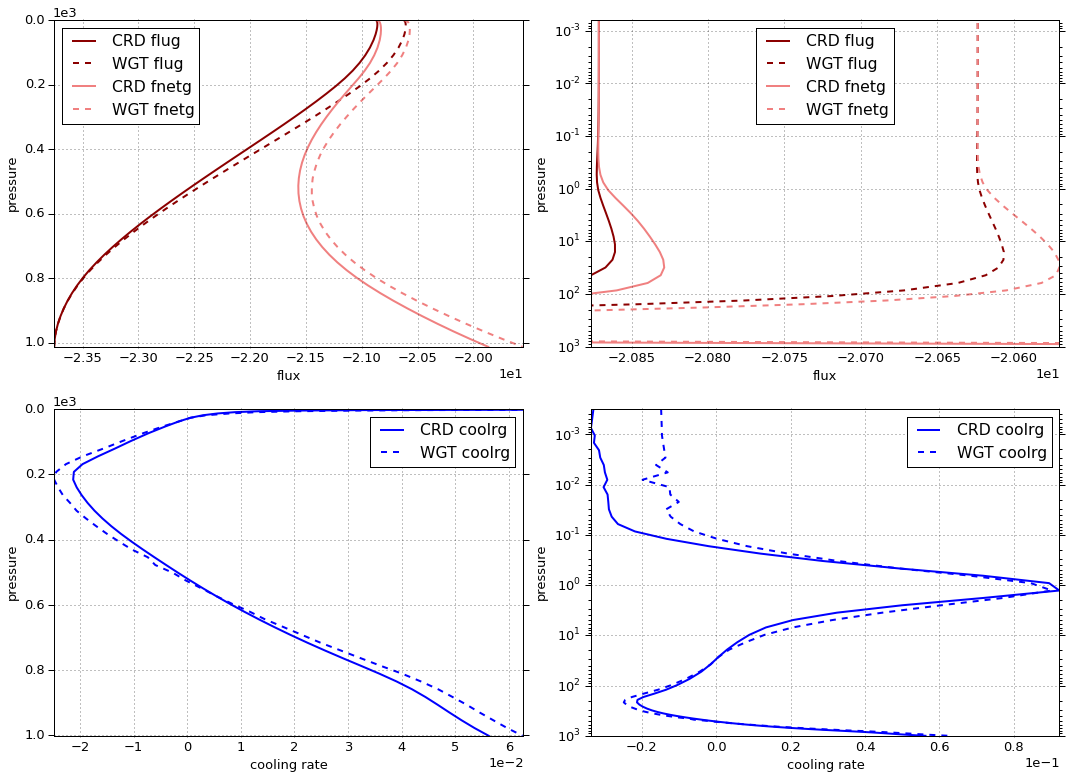

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [14]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.781963  0.000000 -15.781963
  1013     76    -16.090938  0.588028 -15.502910
2 0        1      -4.513059  0.000000  -4.513059
  1013     76     -5.979005  2.136721  -3.842284
3 0        1      -0.516288  0.000000  -0.516288
  1013     76     -1.383483  0.912395  -0.471088
4 0        1      -0.021402  0.000000  -0.021402
  1013     76     -0.130810  0.103806  -0.027003
5 0        1      -0.014995  0.000000  -0.014995
  1013     76     -0.088220  0.073689  -0.014530
6 0        1      -0.023648  0.000000  -0.023648
  1013     76     -0.082716  0.072269  -0.010447


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -15.723096  0.000000 -15.723096
  1013     76    -16.046320  0.626262 -15.420058
2 0        1      -4.433499  0.000000  -4.433499
  1013     76     -6.015587  2.304140  -3.711447
3 0        1      -0.407098  0.000000  -0.407098
  1013     76     -1.389833  1.005993  -0.383840
4 0        1      -0.018583  0.000000  -0.018583
  1013     76     -0.131521  0.109218  -0.022303
5 0        1      -0.014902  0.000000  -0.014902
  1013     76     -0.088782  0.075743  -0.013039
6 0        1      -0.026443  0.000000  -0.026443
  1013     76     -0.083128  0.073003  -0.010125


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1      0.058867  0.000000  0.058867
  1013     76     0.044618  0.038234  0.082852
2 0        1      0.079560  0.000000  0.079560
  1013     76    -0.036582  0.167419  0.130837
3 0        1      0.109190  0.000000  0.109190
  1013     76    -0.006350  0.093598  0.087248
4 0        1      0.002819  0.000000  0.002819
  1013     76    -0.000711  0.005411  0.004700
5 0        1      0.000092  0.000000  0.000092
  1013     76    -0.000562  0.002054  0.001491
6 0        1     -0.002796  0.000000 -0.002796
  1013     76    -0.000413  0.000734  0.000322

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000024
  1001.112500 75     0.012721
2 0.000312    1     -0.000740
  1001.112500 75     0.033380
3 0.000312    1     -0.001619
  1001.112500 75     0.008495
4 0.000312    1     -0.000491
  1001.112500 75     0.000724
5 0.000312    1     -0.001808
  1001.112500 75     0.000487
6 0.000312    1     -0.028322
  1001.112500 75     0.000450


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000022
  1001.112500 75     0.014516
2 0.000312    1     -0.000468
  1001.112500 75     0.037100
3 0.000312    1     -0.000420
  1001.112500 75     0.009232
4 0.000312    1      0.000007
  1001.112500 75     0.000769
5 0.000312    1     -0.000240
  1001.112500 75     0.000500
6 0.000312    1     -0.013676
  1001.112500 75     0.000457


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1      0.000002
  1001.112500 75     0.001795
2 0.000312    1      0.000271
  1001.112500 75     0.003720
3 0.000312    1      0.001199
  1001.112500 75     0.000737
4 0.000312    1      0.000498
  1001.112500 75     0.000044
5 0.000312    1      0.001568
  1001.112500 75     0.000013
6 0.000312    1      0.014645
  1001.112500 75     0.000006

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.871355,0.000000,-20.871355
1013,76,-23.755171,3.886908,-19.868263



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-20.623622,0.000000,-20.623622
1013,76,-23.755171,4.194358,-19.560812



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,2.477330e-01,0.00000,0.247733
1013,76,-1.110000e-07,0.30745,0.307450


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.033003
1001.112500,75,0.056257



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.014819
1001.112500,75,0.062573



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.018184
1001.112500,75,0.006315


In [15]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.686000,0.675487
2,0.244758,0.253233
3,0.056879,0.058507
4,0.005364,0.005537
5,0.003606,0.003737
6,0.003394,0.003499


In [16]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 1

crd                                           wgt        \
              g level       flug          fldg      fnetg   g level   
pressure                                                              
0.000000      1     1 -15.781963  0.000000e+00 -15.781963   1     1   
0.000624      1     2 -15.781963  2.003504e-10 -15.781963   1     2   
0.000876      1     3 -15.781963  2.826021e-10 -15.781963   1     3   
0.001229      1     4 -15.781963  4.014060e-10 -15.781963   1     4   
0.001723      1     5 -15.781963  5.741030e-10 -15.781963   1     5   
0.002417      1     6 -15.781963  8.251961e-10 -15.781963   1     6   
0.003391      1     7 -15.781963  1.190350e-09 -15.781963   1     7   
0.004757      1     8 -15.781963  1.721467e-09 -15.781963   1     8   
0.006672      1     9 -15.781963  2.494083e-09 -15.781963   1     9   
0.009359      1    10 -15.781963  3.618367e-09 -15.781963   1    10   
0.013128      1    11 -15.781963  5.255029e-09 -15.781963   1    11   
0.018415      1    12 -15.781963  7.638962e-09 -15.781963   1    12   
0.025830      1    13 -15.781963  1.111411e-08 -15.781963   1    13   
0.036232      1    14 -15.781963  1.618716e-08 -15.781963   1    14   
0.050823      1    15 -15.781963  2.368648e-08 -15.781963   1    15   
0.071291      1    16 -15.781963  3.567964e-08 -15.781963   1    16   
0.100000      1    17 -15.781964  5.822270e-08 -15.781963   1    17   
0.140271      1    18 -15.781964  1.057814e-07 -15.781964   1    18   
0.196760      1    19 -15.781964  2.085399e-07 -15.781964   1    19   
0.275997      1    20 -15.781965  4.310448e-07 -15.781964   1    20   
0.387100      1    21 -15.781965  9.126918e-07 -15.781965   1    21   
0.543100      1    22 -15.781967  1.955121e-06 -15.781965   1    22   
0.761700      1    23 -15.781968  4.175870e-06 -15.781964   1    23   
1.068500      1    24 -15.781971  8.476286e-06 -15.781962   1    24   
1.498800      1    25 -15.781974  1.511438e-05 -15.781959   1    25   
2.102400      1    26 -15.781979  2.314455e-05 -15.781956   1    26   
2.949000      1    27 -15.781987  3.241802e-05 -15.781955   1    27   
4.136600      1    28 -15.782001  4.336464e-05 -15.781958   1    28   
5.802500      1    29 -15.782023  5.695675e-05 -15.781966   1    29   
8.139200      1    30 -15.782061  7.490938e-05 -15.781986   1    30   
...          ..   ...        ...           ...        ...  ..   ...   
323.525000    1    47 -15.856694  1.667641e-02 -15.840018   1    47   
347.300000    1    48 -15.866811  2.089630e-02 -15.845915   1    48   
371.075000    1    49 -15.877296  2.588300e-02 -15.851413   1    49   
394.850000    1    50 -15.888087  3.169771e-02 -15.856389   1    50   
418.625000    1    51 -15.899117  3.839908e-02 -15.860718   1    51   
442.400000    1    52 -15.910328  4.604007e-02 -15.864288   1    52   
466.175000    1    53 -15.921658  5.466656e-02 -15.866991   1    53   
489.950000    1    54 -15.933054  6.432206e-02 -15.868732   1    54   
513.725000    1    55 -15.944458  7.504653e-02 -15.869411   1    55   
537.500000    1    56 -15.955816  8.687433e-02 -15.868942   1    56   
561.275000    1    57 -15.967071  9.984574e-02 -15.867225   1    57   
585.050000    1    58 -15.978165  1.139959e-01 -15.864169   1    58   
608.825000    1    59 -15.989040  1.293595e-01 -15.859681   1    59   
632.600000    1    60 -15.999636  1.459726e-01 -15.853663   1    60   
656.375000    1    61 -16.009891  1.638637e-01 -15.846027   1    61   
680.150000    1    62 -16.019745  1.830612e-01 -15.836683   1    62   
703.925000    1    63 -16.029136  2.035880e-01 -15.825548   1    63   
727.700000    1    64 -16.038003  2.254694e-01 -15.812533   1    64   
751.475000    1    65 -16.046283  2.487245e-01 -15.797558   1    65   
775.250000    1    66 -16.053920  2.733716e-01 -15.780549   1    66   
799.025000    1    67 -16.060863  2.994112e-01 -15.761452   1    67   
822.800000    1    68 -16.067076  3.268266e-01 -15.740249   1    68   
846.575000    1    69 -16.072547  3.

In [17]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 2

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      2     1 -4.513059  0.000000e+00 -4.513059   2     1 -4.433499   
0.000624      2     2 -4.513059  7.880482e-09 -4.513059   2     2 -4.433499   
0.000876      2     3 -4.513059  1.110173e-08 -4.513059   2     3 -4.433500   
0.001229      2     4 -4.513059  1.571243e-08 -4.513059   2     4 -4.433500   
0.001723      2     5 -4.513060  2.235067e-08 -4.513060   2     5 -4.433500   
0.002417      2     6 -4.513060  3.190954e-08 -4.513060   2     6 -4.433500   
0.003391      2     7 -4.513060  4.567571e-08 -4.513060   2     7 -4.433500   
0.004757      2     8 -4.513060  6.550194e-08 -4.513060   2     8 -4.433500   
0.006672      2     9 -4.513060  9.405520e-08 -4.513060   2     9 -4.433500   
0.009359      2    10 -4.513060  1.351805e-07 -4.513060   2    10 -4.433500   
0.013128      2    11 -4.513061  1.944179e-07 -4.513061   2    11 -4.433500   
0.018415      2    12 -4.513061  2.797568e-07 -4.513061   2    12 -4.433501   
0.025830      2    13 -4.513062  4.027219e-07 -4.513062   2    13 -4.433501   
0.036232      2    14 -4.513063  5.800070e-07 -4.513063   2    14 -4.433502   
0.050823      2    15 -4.513065  8.384221e-07 -4.513064   2    15 -4.433503   
0.071291      2    16 -4.513067  1.237720e-06 -4.513065   2    16 -4.433504   
0.100000      2    17 -4.513070  1.928156e-06 -4.513068   2    17 -4.433506   
0.140271      2    18 -4.513074  3.226871e-06 -4.513071   2    18 -4.433509   
0.196760      2    19 -4.513080  5.725236e-06 -4.513074   2    19 -4.433512   
0.275997      2    20 -4.513088  1.054719e-05 -4.513078   2    20 -4.433517   
0.387100      2    21 -4.513099  1.986574e-05 -4.513079   2    21 -4.433523   
0.543100      2    22 -4.513112  3.790620e-05 -4.513074   2    22 -4.433530   
0.761700      2    23 -4.513126  7.237265e-05 -4.513054   2    23 -4.433536   
1.068500      2    24 -4.513141  1.334556e-04 -4.513007   2    24 -4.433538   
1.498800      2    25 -4.513157  2.249929e-04 -4.512932   2    25 -4.433538   
2.102400      2    26 -4.513189  3.373067e-04 -4.512852   2    26 -4.433549   
2.949000      2    27 -4.513253  4.683694e-04 -4.512785   2    27 -4.433582   
4.136600      2    28 -4.513366  6.216351e-04 -4.512744   2    28 -4.433654   
5.802500      2    29 -4.513556  8.059251e-04 -4.512750   2    29 -4.433790   
8.139200      2    30 -4.513870  1.037107e-03 -4.512833   2    30 -4.434040   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    2    47 -4.929194  1.227621e-01 -4.806432   2    47 -4.894341   
347.300000    2    48 -4.979805  1.489522e-01 -4.830853   2    48 -4.950069   
371.075000    2    49 -5.031282  1.787183e-01 -4.852564   2    49 -5.006647   
394.850000    2    50 -5.083348  2.121324e-01 -4.871216   2    50 -5.063733   
418.625000    2    51 -5.135712  2.492142e-01 -4.886498   2    51 -5.121037   
442.400000    2    52 -5.188135  2.899538e-01 -4.898181   2    52 -5.178174   
466.175000    2    53 -5.240411  3.343112e-01 -4.906099   2    53 -5.235143   
489.950000    2    54 -5.292349  3.822197e-01 -4.910130   2    54 -5.291524   
513.725000    2    55 -5.343775  4.335994e-01 -4.910175   2    55 -5.347179   
537.500000    2    56 -5.394509  4.883715e-01 -4.906138   2    56 -5.401907   
561.275000    2    57 -5.444364  5.464649e-01 -4.897899   2    57 -5.455574   
585.050000    2    58 -5.493145  6.078123e-01 -4.885333   2    58 -5.507909   
608.825000    2    59 -5.540655  6.723379e-01 -4.868317   2    59 -5.558686   
632.600000    2    60 -5.586689  7.399796e-01 -4.846709   2    60 -5.607689   
656.375000    2    61 -5.631038  8.106555e-01 -4.820383   2    61 -5.654722   
680.150000    2    62 -5.673484  8.842835e-01 -4.789200   2    62 -5.699607   
703.925000    2    63 -5.713801  9.607793e-01 -4.753022   2   

In [18]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 3

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      3     1 -0.516288  0.000000e+00 -0.516288   3     1 -0.407098   
0.000624      3     2 -0.516288  3.484824e-08 -0.516288   3     2 -0.407098   
0.000876      3     3 -0.516288  4.912903e-08 -0.516288   3     3 -0.407098   
0.001229      3     4 -0.516288  6.967592e-08 -0.516288   3     4 -0.407098   
0.001723      3     5 -0.516288  9.942090e-08 -0.516288   3     5 -0.407098   
0.002417      3     6 -0.516289  1.424849e-07 -0.516288   3     6 -0.407098   
0.003391      3     7 -0.516289  2.048340e-07 -0.516289   3     7 -0.407098   
0.004757      3     8 -0.516289  2.951003e-07 -0.516289   3     8 -0.407098   
0.006672      3     9 -0.516290  4.257664e-07 -0.516289   3     9 -0.407098   
0.009359      3    10 -0.516290  6.149085e-07 -0.516290   3    10 -0.407099   
0.013128      3    11 -0.516291  8.886804e-07 -0.516290   3    11 -0.407099   
0.018415      3    12 -0.516293  1.284945e-06 -0.516291   3    12 -0.407100   
0.025830      3    13 -0.516294  1.858509e-06 -0.516293   3    13 -0.407100   
0.036232      3    14 -0.516297  2.689000e-06 -0.516294   3    14 -0.407101   
0.050823      3    15 -0.516301  3.904939e-06 -0.516297   3    15 -0.407102   
0.071291      3    16 -0.516306  5.809490e-06 -0.516300   3    16 -0.407104   
0.100000      3    17 -0.516313  9.213974e-06 -0.516304   3    17 -0.407106   
0.140271      3    18 -0.516324  1.586369e-05 -0.516308   3    18 -0.407109   
0.196760      3    19 -0.516337  2.900374e-05 -0.516308   3    19 -0.407111   
0.275997      3    20 -0.516352  5.474287e-05 -0.516297   3    20 -0.407110   
0.387100      3    21 -0.516366  1.046275e-04 -0.516262   3    21 -0.407101   
0.543100      3    22 -0.516370  2.003556e-04 -0.516169   3    22 -0.407073   
0.761700      3    23 -0.516341  3.795700e-04 -0.515961   3    23 -0.407008   
1.068500      3    24 -0.516256  6.883286e-04 -0.515567   3    24 -0.406876   
1.498800      3    25 -0.516111  1.140879e-03 -0.514970   3    25 -0.406672   
2.102400      3    26 -0.515967  1.683580e-03 -0.514284   3    26 -0.406439   
2.949000      3    27 -0.515870  2.294228e-03 -0.513575   3    27 -0.406203   
4.136600      3    28 -0.515854  2.971221e-03 -0.512883   3    28 -0.405981   
5.802500      3    29 -0.515969  3.732952e-03 -0.512236   3    29 -0.405809   
8.139200      3    30 -0.516273  4.620914e-03 -0.511653   3    30 -0.405767   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    3    47 -0.796488  1.359873e-01 -0.660501   3    47 -0.733242   
347.300000    3    48 -0.827012  1.556659e-01 -0.671346   3    48 -0.769048   
371.075000    3    49 -0.857554  1.766865e-01 -0.680867   3    49 -0.804764   
394.850000    3    50 -0.887977  1.989286e-01 -0.689049   3    50 -0.840181   
418.625000    3    51 -0.918151  2.222450e-01 -0.695906   3    51 -0.875178   
442.400000    3    52 -0.947975  2.464820e-01 -0.701493   3    52 -0.909694   
466.175000    3    53 -0.977380  2.715125e-01 -0.705868   3    53 -0.943635   
489.950000    3    54 -1.006315  2.972030e-01 -0.709112   3    54 -0.976807   
513.725000    3    55 -1.034741  3.234406e-01 -0.711300   3    55 -1.009234   
537.500000    3    56 -1.062608  3.501476e-01 -0.712460   3    56 -1.040892   
561.275000    3    57 -1.089864  3.772691e-01 -0.712595   3    57 -1.071796   
585.050000    3    58 -1.116443  4.047648e-01 -0.711678   3    58 -1.101609   
608.825000    3    59 -1.142266  4.325880e-01 -0.709678   3    59 -1.130476   
632.600000    3    60 -1.167253  4.607173e-01 -0.706535   3    60 -1.158265   
656.375000    3    61 -1.191320  4.891233e-01 -0.702197   3    61 -1.184858   
680.150000    3    62 -1.214368  5.177835e-01 -0.696584   3    62 -1.210175   
703.925000    3    63 -1.236288  5.466648e-01 -0.689624   3   

In [19]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 4

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      4     1 -0.021402  0.000000e+00 -0.021402   4     1 -0.018583   
0.000624      4     2 -0.021402  1.717439e-08 -0.021402   4     2 -0.018583   
0.000876      4     3 -0.021402  2.419774e-08 -0.021402   4     3 -0.018583   
0.001229      4     4 -0.021403  3.426016e-08 -0.021402   4     4 -0.018583   
0.001723      4     5 -0.021403  4.876173e-08 -0.021403   4     5 -0.018583   
0.002417      4     6 -0.021403  6.966281e-08 -0.021403   4     6 -0.018583   
0.003391      4     7 -0.021403  9.978906e-08 -0.021403   4     7 -0.018583   
0.004757      4     8 -0.021403  1.432107e-07 -0.021403   4     8 -0.018583   
0.006672      4     9 -0.021403  2.057874e-07 -0.021403   4     9 -0.018583   
0.009359      4    10 -0.021403  2.959658e-07 -0.021403   4    10 -0.018583   
0.013128      4    11 -0.021404  4.259103e-07 -0.021403   4    11 -0.018583   
0.018415      4    12 -0.021404  6.131461e-07 -0.021403   4    12 -0.018583   
0.025830      4    13 -0.021405  8.829125e-07 -0.021404   4    13 -0.018583   
0.036232      4    14 -0.021406  1.271680e-06 -0.021404   4    14 -0.018583   
0.050823      4    15 -0.021407  1.837912e-06 -0.021405   4    15 -0.018584   
0.071291      4    16 -0.021408  2.712881e-06 -0.021406   4    16 -0.018584   
0.100000      4    17 -0.021410  4.226868e-06 -0.021406   4    17 -0.018584   
0.140271      4    18 -0.021413  7.061965e-06 -0.021406   4    18 -0.018584   
0.196760      4    19 -0.021416  1.244522e-05 -0.021404   4    19 -0.018583   
0.275997      4    20 -0.021419  2.259955e-05 -0.021396   4    20 -0.018580   
0.387100      4    21 -0.021419  4.162002e-05 -0.021377   4    21 -0.018574   
0.543100      4    22 -0.021411  7.696347e-05 -0.021334   4    22 -0.018559   
0.761700      4    23 -0.021387  1.410770e-04 -0.021246   4    23 -0.018530   
1.068500      4    24 -0.021334  2.489469e-04 -0.021085   4    24 -0.018475   
1.498800      4    25 -0.021247  4.062984e-04 -0.020841   4    25 -0.018389   
2.102400      4    26 -0.021142  5.972702e-04 -0.020545   4    26 -0.018280   
2.949000      4    27 -0.021025  8.169765e-04 -0.020208   4    27 -0.018150   
4.136600      4    28 -0.020899  1.069313e-03 -0.019829   4    28 -0.017995   
5.802500      4    29 -0.020767  1.367997e-03 -0.019399   4    29 -0.017813   
8.139200      4    30 -0.020629  1.739593e-03 -0.018890   4    30 -0.017594   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    4    47 -0.054955  2.365102e-02 -0.031304   4    47 -0.050280   
347.300000    4    48 -0.058992  2.619163e-02 -0.032801   4    48 -0.054618   
371.075000    4    49 -0.063000  2.882667e-02 -0.034174   4    49 -0.058945   
394.850000    4    50 -0.066964  3.153820e-02 -0.035426   4    50 -0.063220   
418.625000    4    51 -0.070873  3.430494e-02 -0.036568   4    51 -0.067469   
442.400000    4    52 -0.074710  3.711509e-02 -0.037595   4    52 -0.071628   
466.175000    4    53 -0.078474  3.995554e-02 -0.038519   4    53 -0.075734   
489.950000    4    54 -0.082161  4.281690e-02 -0.039344   4    54 -0.079743   
513.725000    4    55 -0.085773  4.568681e-02 -0.040086   4    55 -0.083673   
537.500000    4    56 -0.089313  4.857101e-02 -0.040742   4    56 -0.087547   
561.275000    4    57 -0.092774  5.145859e-02 -0.041315   4    57 -0.091275   
585.050000    4    58 -0.096149  5.435108e-02 -0.041798   4    58 -0.094930   
608.825000    4    59 -0.099432  5.724592e-02 -0.042186   4    59 -0.098475   
632.600000    4    60 -0.102613  6.014359e-02 -0.042469   4    60 -0.101898   
656.375000    4    61 -0.105681  6.304943e-02 -0.042631   4    61 -0.105190   
680.150000    4    62 -0.108629  6.595973e-02 -0.042669   4    62 -0.108342   
703.925000    4    63 -0.111439  6.887092e-02 -0.042568   4   

In [20]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 5

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      5     1 -0.014995  0.000000e+00 -0.014995   5     1 -0.014902   
0.000624      5     2 -0.014995  5.811778e-08 -0.014995   5     2 -0.014902   
0.000876      5     3 -0.014995  8.186597e-08 -0.014995   5     3 -0.014902   
0.001229      5     4 -0.014995  1.158346e-07 -0.014995   5     4 -0.014903   
0.001723      5     5 -0.014995  1.647035e-07 -0.014995   5     5 -0.014903   
0.002417      5     6 -0.014995  2.350113e-07 -0.014995   5     6 -0.014903   
0.003391      5     7 -0.014996  3.361618e-07 -0.014995   5     7 -0.014903   
0.004757      5     8 -0.014996  4.816676e-07 -0.014996   5     8 -0.014903   
0.006672      5     9 -0.014997  6.909290e-07 -0.014996   5     9 -0.014903   
0.009359      5    10 -0.014997  9.918261e-07 -0.014996   5    10 -0.014903   
0.013128      5    11 -0.014999  1.424366e-06 -0.014997   5    11 -0.014903   
0.018415      5    12 -0.015000  2.045939e-06 -0.014998   5    12 -0.014904   
0.025830      5    13 -0.015002  2.938756e-06 -0.014999   5    13 -0.014904   
0.036232      5    14 -0.015006  4.220827e-06 -0.015001   5    14 -0.014905   
0.050823      5    15 -0.015010  6.080085e-06 -0.015004   5    15 -0.014906   
0.071291      5    16 -0.015016  8.927251e-06 -0.015007   5    16 -0.014907   
0.100000      5    17 -0.015024  1.375143e-05 -0.015010   5    17 -0.014909   
0.140271      5    18 -0.015034  2.250594e-05 -0.015011   5    18 -0.014909   
0.196760      5    19 -0.015045  3.853852e-05 -0.015006   5    19 -0.014908   
0.275997      5    20 -0.015055  6.760669e-05 -0.014987   5    20 -0.014903   
0.387100      5    21 -0.015058  1.196836e-04 -0.014939   5    21 -0.014889   
0.543100      5    22 -0.015045  2.117144e-04 -0.014833   5    22 -0.014856   
0.761700      5    23 -0.014992  3.699353e-04 -0.014622   5    23 -0.014787   
1.068500      5    24 -0.014874  6.213505e-04 -0.014252   5    24 -0.014661   
1.498800      5    25 -0.014674  9.708593e-04 -0.013703   5    25 -0.014463   
2.102400      5    26 -0.014422  1.371514e-03 -0.013051   5    26 -0.014211   
2.949000      5    27 -0.014132  1.799586e-03 -0.012333   5    27 -0.013918   
4.136600      5    28 -0.013808  2.246894e-03 -0.011561   5    28 -0.013578   
5.802500      5    29 -0.013445  2.724598e-03 -0.010721   5    29 -0.013192   
8.139200      5    30 -0.013039  3.265748e-03 -0.009773   5    30 -0.012751   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    5    47 -0.032977  1.750264e-02 -0.015474   5    47 -0.031307   
347.300000    5    48 -0.035871  1.935289e-02 -0.016518   5    48 -0.034259   
371.075000    5    49 -0.038756  2.126150e-02 -0.017494   5    49 -0.037204   
394.850000    5    50 -0.041616  2.321296e-02 -0.018403   5    50 -0.040128   
418.625000    5    51 -0.044437  2.519635e-02 -0.019241   5    51 -0.043061   
442.400000    5    52 -0.047215  2.720401e-02 -0.020011   5    52 -0.045959   
466.175000    5    53 -0.049945  2.922509e-02 -0.020719   5    53 -0.048819   
489.950000    5    54 -0.052622  3.125083e-02 -0.021371   5    54 -0.051610   
513.725000    5    55 -0.055246  3.327741e-02 -0.021969   5    55 -0.054370   
537.500000    5    56 -0.057818  3.530482e-02 -0.022513   5    56 -0.057060   
561.275000    5    57 -0.060334  3.733153e-02 -0.023002   5    57 -0.059696   
585.050000    5    58 -0.062789  3.935861e-02 -0.023430   5    58 -0.062281   
608.825000    5    59 -0.065178  4.138690e-02 -0.023791   5    59 -0.064788   
632.600000    5    60 -0.067498  4.341699e-02 -0.024081   5    60 -0.067221   
656.375000    5    61 -0.069737  4.544884e-02 -0.024288   5    61 -0.069581   
680.150000    5    62 -0.071889  4.748289e-02 -0.024407   5    62 -0.071829   
703.925000    5    63 -0.073946  4.951693e-02 -0.024429   5   

In [21]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, model.data['flux'].sel(g=g).to_dataframe())
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

pd.concat(dfs, keys=keys, axis=1)

# Table: flux. g-group 6

crd                                         wgt                  \
              g level      flug          fldg     fnetg   g level      flug   
pressure                                                                      
0.000000      6     1 -0.023648  0.000000e+00 -0.023648   6     1 -0.026443   
0.000624      6     2 -0.023650  7.495346e-07 -0.023650   6     2 -0.026445   
0.000876      6     3 -0.023652  1.055151e-06 -0.023650   6     3 -0.026445   
0.001229      6     4 -0.023653  1.490633e-06 -0.023652   6     4 -0.026446   
0.001723      6     5 -0.023655  2.114548e-06 -0.023653   6     5 -0.026447   
0.002417      6     6 -0.023659  3.008297e-06 -0.023656   6     6 -0.026449   
0.003391      6     7 -0.023663  4.288223e-06 -0.023659   6     7 -0.026451   
0.004757      6     8 -0.023669  6.120288e-06 -0.023663   6     8 -0.026455   
0.006672      6     9 -0.023677  8.740680e-06 -0.023669   6     9 -0.026459   
0.009359      6    10 -0.023689  1.248517e-05 -0.023677   6    10 -0.026467   
0.013128      6    11 -0.023706  1.782893e-05 -0.023688   6    11 -0.026476   
0.018415      6    12 -0.023729  2.544139e-05 -0.023704   6    12 -0.026488   
0.025830      6    13 -0.023762  3.625840e-05 -0.023726   6    13 -0.026503   
0.036232      6    14 -0.023807  5.155751e-05 -0.023756   6    14 -0.026528   
0.050823      6    15 -0.023871  7.346425e-05 -0.023797   6    15 -0.026563   
0.071291      6    16 -0.023959  1.062444e-04 -0.023853   6    16 -0.026607   
0.100000      6    17 -0.024077  1.594218e-04 -0.023917   6    17 -0.026664   
0.140271      6    18 -0.024224  2.511147e-04 -0.023973   6    18 -0.026732   
0.196760      6    19 -0.024400  4.099749e-04 -0.023990   6    19 -0.026807   
0.275997      6    20 -0.024593  6.811163e-04 -0.023912   6    20 -0.026871   
0.387100      6    21 -0.024773  1.135965e-03 -0.023637   6    21 -0.026893   
0.543100      6    22 -0.024865  1.885615e-03 -0.022979   6    22 -0.026806   
0.761700      6    23 -0.024726  3.078096e-03 -0.021648   6    23 -0.026486   
1.068500      6    24 -0.024184  4.814435e-03 -0.019369   6    24 -0.025792   
1.498800      6    25 -0.023134  6.997440e-03 -0.016136   6    25 -0.024633   
2.102400      6    26 -0.021822  9.113339e-03 -0.012708   6    26 -0.023205   
2.949000      6    27 -0.020381  1.085015e-02 -0.009531   6    27 -0.021601   
4.136600      6    28 -0.018890  1.204591e-02 -0.006844   6    28 -0.019912   
5.802500      6    29 -0.017386  1.270926e-02 -0.004677   6    29 -0.018187   
8.139200      6    30 -0.015884  1.296739e-02 -0.002917   6    30 -0.016471   
...          ..   ...       ...           ...       ...  ..   ...       ...   
323.525000    6    47 -0.027580  1.757341e-02 -0.010006   6    47 -0.027130   
347.300000    6    48 -0.030334  1.943654e-02 -0.010897   6    48 -0.029902   
371.075000    6    49 -0.033090  2.134478e-02 -0.011745   6    49 -0.032682   
394.850000    6    50 -0.035836  2.328846e-02 -0.012548   6    50 -0.035452   
418.625000    6    51 -0.038559  2.525694e-02 -0.013302   6    51 -0.038210   
442.400000    6    52 -0.041250  2.724079e-02 -0.014009   6    52 -0.040935   
466.175000    6    53 -0.043903  2.923217e-02 -0.014671   6    53 -0.043624   
489.950000    6    54 -0.046517  3.122310e-02 -0.015294   6    54 -0.046279   
513.725000    6    55 -0.049093  3.321174e-02 -0.015881   6    55 -0.048894   
537.500000    6    56 -0.051627  3.519621e-02 -0.016431   6    56 -0.051472   
561.275000    6    57 -0.054118  3.717666e-02 -0.016941   6    57 -0.054005   
585.050000    6    58 -0.056562  3.915707e-02 -0.017405   6    58 -0.056496   
608.825000    6    59 -0.058952  4.113481e-02 -0.017817   6    59 -0.058935   
632.600000    6    60 -0.061282  4.311309e-02 -0.018168   6    60 -0.061302   
656.375000    6    61 -0.063544  4.509123e-02 -0.018453   6    61 -0.063617   
680.150000    6    62 -0.065729  4.706965e-02 -0.018660   6    62 -0.065841   
703.925000    6    63 -0.067825  4.904786e-02 -0.018777   6   

In [22]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')